# Implementation of Movie Recommender System in Python

A **recommender system** is a tool designed to predict or filter preferences based on a user’s choices. These systems are widely used in various domains, including movies, music, news, books, research articles, search queries, social tags, and general products.

Recommender systems generate a list of recommendations through two primary methods:

**1. Collaborative Filtering:**
Collaborative filtering builds a model from a user’s past behavior (such as items purchased or searched) and the behavior of similar users. This model is then utilized to predict items (or ratings for items) that the user might be interested in. Essentially, it analyzes what similar users have liked and recommends accordingly.

**2. Content-Based Filtering:**
Content-based filtering uses a series of discrete characteristics of an item to recommend additional items with similar properties. This method relies entirely on a description of the item and the user’s preference profile. It suggests items based on what the user has shown interest in previously, focusing on the attributes of the items themselves.







# Data Set

To download the files, click on the links

- [file.tsv](https://drive.google.com/file/d/1Rd41cZ2ngpCbDoRkj3Y2OHa_JiBsVGc7/view?usp=sharing)

| Index | Column1 | Column2 | Column3 |
|-------|---------|---------|---------|
| 0     | 50      | 5       | 881250949 |
| 0     | 172     | 5       | 881250949 |
| 0     | 133     | 1       | 881250949 |
| 196   | 242     | 3       | 881250949 |
| 186   | 302     | 3       | 891717742 |

- [Movie_Id_Titles.csv](https://drive.google.com/file/d/1k2W6C8DAbXsOkQw1v_20Kz_e0TsT46h7/view?usp=share_link)

| item_id | title              |
|---------|--------------------|
| 1       | Toy Story (1995)   |
| 2       | GoldenEye (1995)   |
| 3       | Four Rooms (1995)  |
| 4       | Get Shorty (1995)  |
| 5       | Copycat (1995)     |

Import dataset with delimiter “\t” as the file is a tsv file (tab-separated file).

# Importing libraries and Datasets

In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# import pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

column_names = ['user_id', 'item_id', 'rating', 'timestamp']

# load the dataset from Google Drive
file_path = '/content/drive/MyDrive/ML/Implementation_of_Movie_Recommender_System/file.tsv'
df = pd.read_csv(file_path, sep='\t', names=column_names)

# check the head of the data
df.head()

Mounted at /content/drive/


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [2]:
# load the movie id & title dataset
path = '/content/drive/MyDrive/ML/Implementation_of_Movie_Recommender_System/Movie_Id_Titles.csv'
movie_titles = pd.read_csv(path)

movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# Merging the Datasets

In [3]:
data = pd.merge(df, movie_titles, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Exploratory Data Analysis

In [4]:
data.shape

(100003, 5)

In [5]:
data['title'].nunique()

1664

In [6]:
# mean rating of all movies
mean_ratings = data.groupby('title')['rating'].mean().sort_values(ascending=False)
mean_ratings

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

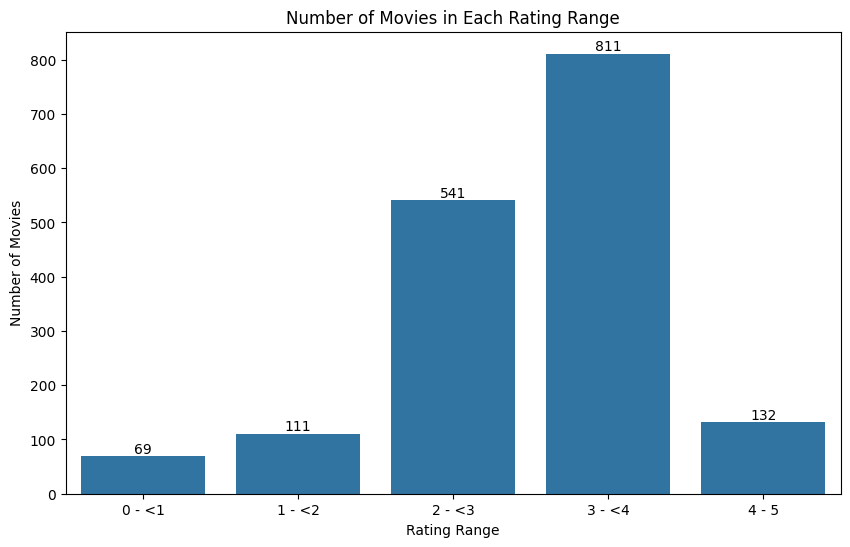

In [7]:
labels = ['0 - <1', '1 - <2', '2 - <3', '3 - <4', '4 - 5']
bins = [0, 1, 2, 3, 4, 5.1]
mean_ratings_binned = pd.cut(mean_ratings, bins=bins, labels=labels, include_lowest=True)
count_in_bins = mean_ratings_binned.value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=count_in_bins.index, y=count_in_bins.values)
plt.xlabel('Rating Range')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Rating Range')
for index, value in enumerate(count_in_bins.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [8]:
# count rating of all movies
data.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [9]:
# creating df with rating count values
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [10]:
most_rated_title = ratings.sort_values(by='num of ratings', ascending=False).head(1)
print("Title with the highest number of ratings:")
print(most_rated_title)

Title with the highest number of ratings:
                    rating  num of ratings
title                                     
Star Wars (1977)  4.359589             584


In [15]:
item_id_star_wars = data[data['title'] == 'Star Wars (1977)']['item_id']
item_id_star_wars.head(1)

0    50
Name: item_id, dtype: int64

# Visualization Imports

In [16]:
sns.set_style('white')
# %matplotlib inline

<Axes: >

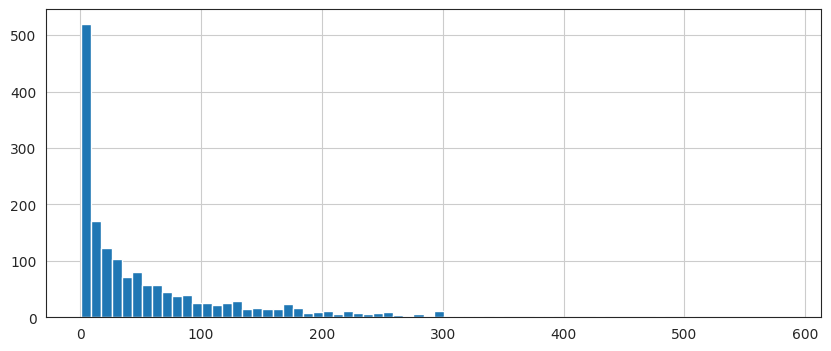

In [18]:
# plot graph of 'num of ratings column'
plt.figure(figsize = (10, 4))

ratings['num of ratings'].hist(bins = 70)

<Axes: >

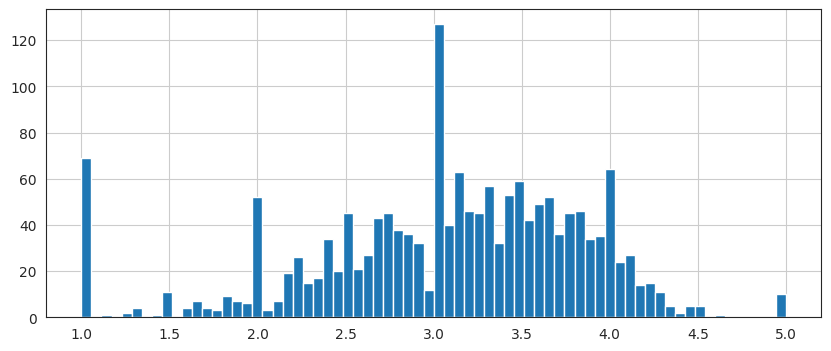

In [17]:
# plot graph of 'ratings' column
plt.figure(figsize = (10, 4))

ratings['rating'].hist(bins = 70)

In [22]:
# sorting values according to the 'num of rating column'
moviemat = data.pivot_table(index = 'user_id', columns = 'title',  values = 'rating')
# moviemat.head()
ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [23]:
# analysing correlation with similar movies
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

starwars_user_ratings.head()
# liarliar_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [30]:
# analysing correlation with similar movies
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)

corr_starwars.head(10)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [35]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)
# corr_starwars = corr_starwars.join(ratings['num of ratings'])

corr_starwars.head()

corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [37]:
# Similar movies as of liarliar
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation'])
corr_liarliar.dropna(inplace = True)

corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
